## STATS 507 HW7 Structure data

In [2]:
import urllib.request
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
import math

### Problem 1 Regular Expressions: Warmup
In this problem, you’ll get practice with basic regular expressions. Pay particular attention to edge cases such as the empty string and single-character strings when writing your regexes. At the URL http://www.greenteapress.com/thinkpython/code/words.txt is a list of about 100,000 English words.

1. Use urllib to open the URL and read the file, and produce a list of ASCII strings so that each line of the file corresponds to an element of the list. You will likely need to convert the raw bytes read from the webpage to ASCII characters, for which you should see the documentation for the string methods encode and decode. How many words are in the file?

In [3]:
with urllib.request.urlopen("http://www.greenteapress.com/thinkpython/code/words.txt") as response:
    txt = response.read()

In [4]:
a = txt.decode('utf-8').splitlines()

In [5]:
len(a)

113809

There are 113809 words in the file.

2. It is a good habit to always look at your data to check that it makes sense. Have a look at the words in the list. Does anything jump out at you? 
    
    Note: I am not requiring you to do anything specific, here. Just look at the data!

In [6]:
a[:10]

['aa',
 'aah',
 'aahed',
 'aahing',
 'aahs',
 'aal',
 'aalii',
 'aaliis',
 'aals',
 'aardvark']

In [7]:
a[-10:]

['zymogene',
 'zymogenes',
 'zymogens',
 'zymologies',
 'zymology',
 'zymoses',
 'zymosis',
 'zymotic',
 'zymurgies',
 'zymurgy']

The data looks fine, just that some words are not really a real word.

3. Write a regular expression that matches any string containing exactly four consecutive consonants. Compile this regular expression, and assign it to a variable called four_consecutive_consonants. Use this regex to determine how many words from the list contain exactly four consecutive consonants. For the purposes of this specific problem, the vowels are a, e, i, o, u, y. All other letters are consonants. Produce a list of all such words.

In [8]:
four_consecutive_consonants = re.compile(r'[^aeiouy]{4}')

In [9]:
four_consecutive_consonants.search("thyba") is None

True

In [10]:
four_consecutive_consonants.search("athsf") is None

False

In [11]:
four_consecutive_consonants_list = list(filter(four_consecutive_consonants.search, a))

In [12]:
len(four_consecutive_consonants_list)

1629

4. Write a regular expression that matches any string that contains no instances of the letter e. Compile this regular expression, and assign it to a variable called gadsby. 

    (Gadsby is the title of an English novel written in the 1930s that contains almost no instances of the letter e). 
    
    How many words in the list do not contain the letter e?


In [13]:
gadsby = re.compile(r'[^e]+$')

In [14]:
gadsby_list = list(filter(gadsby.match, a))

In [15]:
len(gadsby_list)

37641

In [16]:
# check if gadsby really does not have instance e
s = 0
for i in gadsby_list:
    for j in i:
        if j == "e":
            s +=1
print(s)

0


There are 37641 words contains no letter e

5. Write a regular expression that matches any string that begins and ends with a vowel and has no vowels in between. For the purposes of this specific problem, y is neither consonant nor vowel, so consonants are the 20 letters that are not one of a, e, i, o, u, y and vowels are a, e, i, o, u.   
    The words need not begin and end with the same vowel, so angle is a valid match. 
    
    Compile this regular expression, and assign it to a variable called vowel_vowel.   
    How many words begin and end with a vowel with no vowels in between?


In [17]:
vowel_vowel = re.compile(r'^[aeiou]{1}[^aeiouy]*[aeiou]$')

In [18]:
vowel_vowel.search("ojzsi") is not None

True

In [19]:
vowel_vowel.search("zjzsi") is None

True

In [20]:
vowel_vowel.search("ajzsa") is not None

True

In [21]:
vowel_vowel.search("ai") is not None

True

In [22]:
vowel_vowel.search("ajysi") is None

True

In [23]:
vowel_list = list(filter(vowel_vowel.search, a))

In [24]:
len(vowel_list)

169

There are 169 words begin and end with a vowel with no vowels in between.

6. Write a regular expression that matches any string whose last two characters are the first two characters in reverse order. So, for example, your regex should match repeater and stats, but not neoprene. Compile this regular expression and assign it to a variable called bookends.   
    
    How many words in the list have this property? 

    Hint: be careful of the cases in which the word is length less or equal to 3. You may handle the case of a single character (e.g., a), as you like, but please give an explanation for your choice.

In [25]:
bookends = re.compile(r'(^(\w)(\w)\w*\3\2)$|(^(\w)\w\5)$|(^(\w)\7$)')

In [26]:
bookends.match('neoprene') is None

True

In [27]:
bookends.match('neopreen') is not None

True

In [28]:
bookends.match('stats') is not None

True

In [29]:
bookends.match('ae') is not None

False

In [30]:
bookends.match('aa') is not None

True

In [31]:
bookends.match('aea') is not None

True

In [32]:
bookends.match('aeb') is not None

False

In [33]:
bookends.match('aaa') is not None

True

In [34]:
bookend_list = list(filter(vowel_vowel.search, a))
len(bookend_list)

169

There are 169 words that contain last two characters are the first two characters in reverse order.

### Problem 2 Exploring Internet Traffic with Regexes
In this problem, you’ll get a taste of a more realistic application of regular expressions. The file http://umich.edu/~klevin/teaching/Winter2019/STATS507/SkypeIRC.txt contains data generated by web traffic associated with Skype and IRC, captured using the Wireshark program, a common tool for analyzing web traffic. The original data file can be found on the Wireshark wiki, https://wiki.wireshark.org/SampleCaptures, but please use the file provided on my website for this assignment.

1. Download the file from the URL above (or use urllib or requests to open it directly, being careful to convert the raw bytes back to UTF-8) and read its contents into a string. Each line of this file corresponds to a single packet sent over the internet. How many packets are in this file? Save the answer in a variable n_packets. 

    Note: if you decide to download the file, don’t forget to include a copy of it in your submission so that we can run your code.


In [35]:
with urllib.request.urlopen("http://umich.edu/~klevin/teaching/Winter2019/STATS507/SkypeIRC.txt") as response2:
    txt2 = response2.read()

In [36]:
packet = txt2.decode('utf-8').splitlines()
packet = [i.strip() for i in packet]

In [37]:
packet[:10]

['1   0.000000  192.168.1.2 → 212.204.214.114 IRC 96 Request (ISON)',
 '2   0.125852 212.204.214.114 → 192.168.1.2  TCP 66 6667 → 2848 [ACK] Seq=1 Ack=31 Win=57890 Len=0 TSval=2196036564 TSecr=14215752',
 '3   0.137361 212.204.214.114 → 192.168.1.2  IRC 112 Response (303)',
 '4   0.137413  192.168.1.2 → 212.204.214.114 TCP 66 2848 → 6667 [ACK] Seq=31 Ack=47 Win=8011 Len=0 TSval=14215889 TSecr=2196036565',
 '5   0.235960  192.168.1.2 → 192.168.1.1  DNS 84 Standard query 0x311f PTR 2.1.168.192.in-addr.arpa',
 '6   0.236116  192.168.1.2 → 192.168.1.1  DNS 88 Standard query 0x3120 PTR 114.214.204.212.in-addr.arpa',
 '7   0.270252  192.168.1.1 → 192.168.1.2  DNS 84 Standard query response 0x311f PTR 2.1.168.192.in-addr.arpa',
 '8   0.294105  192.168.1.1 → 192.168.1.2  DNS 123 Standard query response 0x3120 PTR 114.214.204.212.in-addr.arpa PTR sterling.freenode.net',
 '9   0.985963  192.168.1.2 → 192.168.1.1  DNS 81 Standard query 0x3121 A sterling.freenode.net',
 '10   0.988328  192.168.1.1

In [38]:
n_packet = len(packet)
n_packet

2263

There are total 2263 packets

2. Use regular expressions to extract all the IP addresses from the file and collect them in a Python list. An IP address consists of four numbers, which are displayed as A.B.C.D where A,B,C and D are each numbers between 0 and 255. How many unique IP addresses appear in the data set? Save the answer in a variable ip_addresses


In [39]:
IP = re.compile(r"((2[01234]\d|25[0-5]|1\d{2}|\d{1,2})\.(2[01234]\d|25[0-5]|1\d{2}|\d{1,2})\.(2[01234]\d|25[0-5]|1\d{2}|\d{1,2})\.(2[01234]\d|25[0-5]|1\d{2}|\d{1,2}))")

In [40]:
one = IP.search(packet[10])

In [41]:
one.group()

'192.168.1.2'

In [42]:
# use set to extract uniqie PI
IP_address = set()
for i in packet:
    IP_extract = IP.findall(i)
    for i in IP_extract:
        IP_address.add(i[0])

In [43]:
ip_addresses = len(set(IP_address))
ip_addresses

368

There are 368 IP in the datasets.

3. Write a function called get_packets_by_regex that takes a single raw string as its argument and returns all lines of the input file that match the input raw string as a regular expression. So, for example, get_packets_by_regex(r’comcast’) will return all lines from the file containing the string ’comcast’. 

    Your function should perform appropriate error checking to ensure that the input is a string, but you do not need to check that it is a raw string.

In [44]:
def get_packets_by_regex(s):
    if type(s) != str:
        raise TypeError('input not a string')
    regexp = re.compile(s)
    lines_contained = []
    for line in packet:
        if regexp.search(line):
            lines_contained.append(line)
    return lines_contained

res = get_packets_by_regex(r'comcast')
len(res)

74

4. The second piece of text (i.e., non-whitespace) on each line is a time stamp, counting the time (in seconds) since the beginning of the traffic recording. Using matplotlib, create a plot displaying how many packets appeared in each second of the recording. A histogram or line plot is the most obvious way to do this, but you should feel free to use a more creative way of displaying this information if you wish to do so. 

    Note: in case it wasn’t obvious, there is no need to use a regular expression for this subproblem if you do not want to.

In [45]:
# extract time stamp
packet[1].split()[1]

'0.125852'

In [46]:
time_stamp_list = []
for i in range(len(packet)):
    time_stamp_list.append(float(packet[i].split()[1]))
len(time_stamp_list)

2263

In [47]:
time_stamp_list[5:10]

[0.236116, 0.270252, 0.294105, 0.985963, 0.988328]

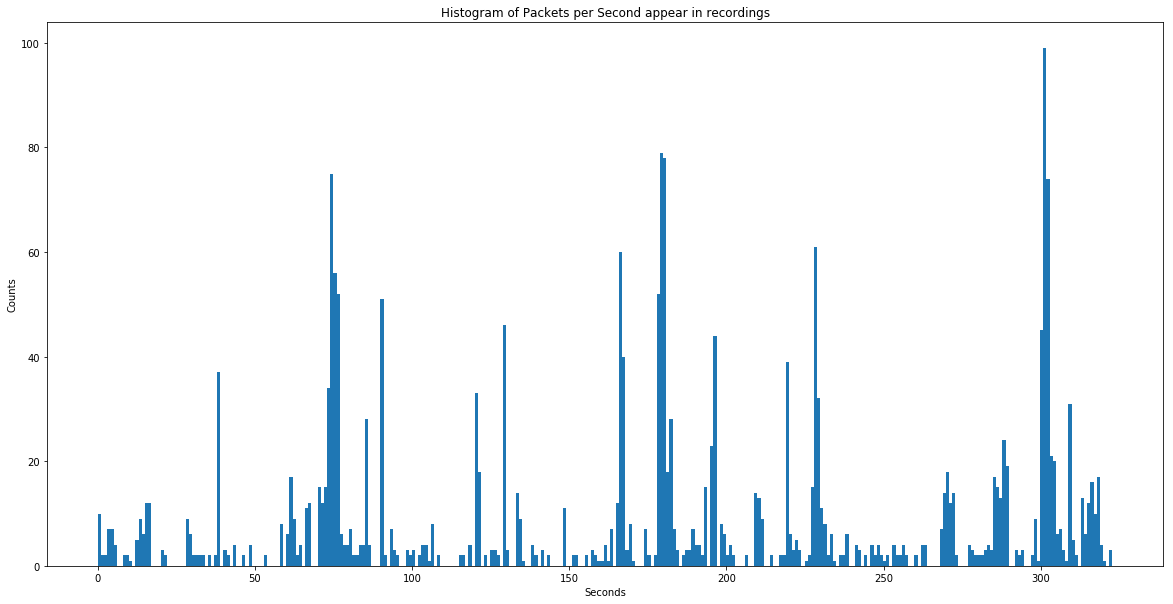

In [48]:
ylim = math.ceil(max(time_stamp_list))
plt.figure(figsize=(20, 10))
plt.hist(time_stamp_list, ylim)
plt.ylabel('Counts')
plt.xlabel('Seconds')
plt.title('Histogram of Packets per Second appear in recordings')
plt.show()

### Problem 3 Retrieving Data from the Web
In this problem, we’ll scrape data from Wikipedia using BeautifulSoup. Documentation for BeauitfulSoup can be found at https://www.crummy.com/software/BeautifulSoup/bs4/doc/. As mentioned in lecture, there is another package, called requests, which is becoming quite popular, which you are welcome to use for this problem instead, if you wish. Documentation for the requests package can be found at http://docs.python-requests.org/en/master/.
Suppose you are trying to choose a city to vacation in. A major factor in your decision is weather. Conveniently, lots of weather information is present in the Wikipedia articles for most world cities. Your job in this problem is to use BeautifulSoup to retrieve weather information from Wikipedia articles. We should note that in practice, such information is typically more easily obtained from, for example, the National Oceanic and Atmospheric Administration (NOAA), in the case of American cities, and from analogous organizations in other countries.


1. Look at a few Wikipedia pages corresponding to cities.   
    For example:  
    • https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan   
    • https://en.wikipedia.org/wiki/Buenos_Aires  
    • https://en.wikipedia.org/wiki/Harbin  
    
    Note that most city pages include a table titled something like “Climate data for [Cityname] (normals YYYY-YYYY, extremes YYYY-YYYY)” Find a Wikipedia page for a city that includes such a table (such as one of the three above). 
    
    In your jupyter notebook, open the URL and read the HTML using either urllib or requests, and parse it with BeautifulSoup using the standard parser, html.parser. Have a look at the parsed HTML and find the climate data table, which will have the tag table and will contain a child tag th containing a string similar to
Climate data for [Cityname] (normals YYYY-YYYY, extremes YYYY-YYYY).

    Find the node in the BeautifulSoup object corresponding to this table. What is the structure of this node of the tree (e.g., how many children does the table have, what are their tags, etc.)? You may want to learn a bit about the structure of HTML tables by looking at the resources available on these websites:  
• https://developer.mozilla.org/en-US/docs/Web/HTML/Element/table   
• https://www.w3schools.com/html/html_tables.asp  
• https://www.w3.org/TR/html401/struct/tables.html

In [49]:
with urllib.request.urlopen("https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan") as response3:
    aa = response3.read()

In [50]:
aa_parse = BeautifulSoup(aa, 'html.parser')
aa_parse

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Ann Arbor, Michigan - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Ann_Arbor,_Michigan","wgTitle":"Ann Arbor, Michigan","wgCurRevisionId":886551224,"wgRevisionId":886551224,"wgArticleId":2067,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use mdy dates from June 2017","Featured articles","Articles with short description","Coordinates on Wikidata","Portal templates all redlinked portals","CS1 maint: Extra text: authors list","Wikipedia articles with BNF identifiers","Wikipedia articles with GND identifiers","Wikipedia articles with LCCN identifi

An HTML table is defined with the "table" tag.  
Each table row is defined with the "tr" tag.   
A table header is defined with the "th" tag.   --> "Climate data for Ann Arbor, Michigan"  
A table data/cell is defined with the "td" tag.

In [51]:
# search node with the key word "Climate data for Ann Arbor, Michiga" with the tag th
table_search = aa_parse.find_all(string=re.compile(r"Climate data for Ann Arbor, Michigan"),name="th")
# access the parent node for the entire talbe
climate_node = table_search[0].parent.parent
children_list = [n for n in climate_node.children if n != "\n"]

In [52]:
climate_node.contents

[<tr>
 <th colspan="14">Climate data for Ann Arbor, Michigan (UMich, 1981–2010)
 </th></tr>, '\n', <tr>
 <th scope="row">Month
 </th>
 <th scope="col">Jan
 </th>
 <th scope="col">Feb
 </th>
 <th scope="col">Mar
 </th>
 <th scope="col">Apr
 </th>
 <th scope="col">May
 </th>
 <th scope="col">Jun
 </th>
 <th scope="col">Jul
 </th>
 <th scope="col">Aug
 </th>
 <th scope="col">Sep
 </th>
 <th scope="col">Oct
 </th>
 <th scope="col">Nov
 </th>
 <th scope="col">Dec
 </th>
 <th scope="col" style="border-left-width:medium">Year
 </th></tr>, '\n', <tr style="text-align: center;">
 <th scope="row" style="height: 16px;">Record high °F (°C)
 </th>
 <td style="background: #FF860D; color:#000000;">72<br/>(22)
 </td>
 <td style="background: #FF9B37; color:#000000;">67<br/>(19)
 </td>
 <td style="background: #FF5600; color:#000000;">85<br/>(29)
 </td>
 <td style="background: #FF4800; color:#000000;">88<br/>(31)
 </td>
 <td style="background: #FF2C00; color:#000000;">95<br/>(35)
 </td>
 <td style="backg

In [53]:
children_list

[<tr>
 <th colspan="14">Climate data for Ann Arbor, Michigan (UMich, 1981–2010)
 </th></tr>, <tr>
 <th scope="row">Month
 </th>
 <th scope="col">Jan
 </th>
 <th scope="col">Feb
 </th>
 <th scope="col">Mar
 </th>
 <th scope="col">Apr
 </th>
 <th scope="col">May
 </th>
 <th scope="col">Jun
 </th>
 <th scope="col">Jul
 </th>
 <th scope="col">Aug
 </th>
 <th scope="col">Sep
 </th>
 <th scope="col">Oct
 </th>
 <th scope="col">Nov
 </th>
 <th scope="col">Dec
 </th>
 <th scope="col" style="border-left-width:medium">Year
 </th></tr>, <tr style="text-align: center;">
 <th scope="row" style="height: 16px;">Record high °F (°C)
 </th>
 <td style="background: #FF860D; color:#000000;">72<br/>(22)
 </td>
 <td style="background: #FF9B37; color:#000000;">67<br/>(19)
 </td>
 <td style="background: #FF5600; color:#000000;">85<br/>(29)
 </td>
 <td style="background: #FF4800; color:#000000;">88<br/>(31)
 </td>
 <td style="background: #FF2C00; color:#000000;">95<br/>(35)
 </td>
 <td style="background: #FF11

In [54]:
# number of direct children
len(children_list)

12

In [55]:
# number of total children
child_len = climate_node.findChildren()
len(child_len)

252

In [56]:
# print all the tags
for child in climate_node.contents:
    if child == "\n":
        continue
    print("{} ".format(child.name), end=":")
    for descendants in child.children:
            if descendants == "\n":
                continue
            print("{}".format(descendants.name),end=",")
    print("")

tr :th,
tr :th,th,th,th,th,th,th,th,th,th,th,th,th,th,
tr :th,td,td,td,td,td,td,td,td,td,td,td,td,td,
tr :th,td,td,td,td,td,td,td,td,td,td,td,td,td,
tr :th,td,td,td,td,td,td,td,td,td,td,td,td,td,
tr :th,td,td,td,td,td,td,td,td,td,td,td,td,td,
tr :th,td,td,td,td,td,td,td,td,td,td,td,td,td,
tr :th,td,td,td,td,td,td,td,td,td,td,td,td,td,
tr :th,td,td,td,td,td,td,td,td,td,td,td,td,td,
tr :th,td,td,td,td,td,td,td,td,td,td,td,td,td,
tr :th,td,td,td,td,td,td,td,td,td,td,td,td,td,
tr :td,


2. Write a function retrieve climate table that takes as its only argument a Wikipedia URL, and returns the BeautifulSoup object corresponding to the climate data table (if it exists in the page) and returns None if no such table exists on the page. 

    You should check that the URL is retrieved successfully, and raise an error if urllib2 fails to successfully read the website. You may notice that some city pages include more than one climate data table or several nested tables (see, for example, https://en.wikipedia.org/wiki/Los_Angeles ). 
    
    In this case, your function may arbitrarily choose one of the tables to return as a BeautifulSoup object. 
    
    Note: a good way to check for edge cases is to test your script on the Wikipedia pages for a few of your favorite cities. The pages for Los Angeles, Hyderabad and Boston will give good examples of edge cases that you should be able to handle, but note that these are by no means exhaustive of all the possible edge cases. 
    
    Hint: make use of the contents attribute of the BeautifulSoup objects and the ability to change the elements of the contents list to Unicode.


In [57]:
def retrieve_climate_table(url):
   
    response = urllib.request.urlopen(url)
    
    # Check if the HTTP request success
    if response.getcode() != 200:
        raise RuntimeError("Failed to retrieve the website!")
   
    html_doc = response.read()
        
    # parse url using beautiful soup
    city_parse = BeautifulSoup(html_doc, 'html.parser')
    # search keyword "Climate data for"
    city_climate = re.compile("Climate data for") 
    # find table with keyword "Climate data for"
    for i in city_parse.find_all('table'):
        # search for th (table header)
        if i.th is not None:
            if city_climate.match(i.th.get_text()) is not None:
                return(i)
        # search for caption
        if i.caption is not None:
            if city_climate.match(i.caption.get_text()) is not None:
                return(i)
    # returns None if no such table exists on the page
    return(None)


In [58]:
from IPython.core.display import display, HTML
AA = retrieve_climate_table("https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan")
print(type(AA))
display(HTML(str(AA)))

<class 'bs4.element.Tag'>


Climate data for Los Angeles

In [59]:
LA = retrieve_climate_table("https://en.wikipedia.org/wiki/Los_Angeles")
print(type(LA))
display(HTML(str(LA)))

<class 'bs4.element.Tag'>


In [60]:
type(LA)

bs4.element.Tag

For climate data in Hyderabad

In [61]:
Hyderabald = retrieve_climate_table("https://en.wikipedia.org/wiki/Hyderabad")
print(type(Hyderabald))
display(HTML(str(Hyderabald)))

<class 'bs4.element.Tag'>


For climate data in Boston

In [62]:
Boston = retrieve_climate_table("https://en.wikipedia.org/wiki/Boston")
print(type(Boston))
display(HTML(str(Boston)))

<class 'bs4.element.Tag'>


3. As you look at some of the climate data tables, you may notice that different cities’ tables contain different information. For example, not all cities include snowfall data. 

    Write a function list_climate_table_row_names that takes as its only argument a Wikipedia URL and returns a list of the row names of the climate data table, or returns None if no such table exists. The list returned by your function should, ideally, consist solely of Python strings (either Unicode or ASCII), and should not include any BeautifulSoup objects or HTML 
    
    Hint: see the BeautifulSoup method get text()). The list returned by your script should not include an entry corresponding to the Climate data for... row in the table. 
    
      Second hint: you are looking for HTML table header (th) objects. The HTML attribute scope is your friend here, because in the context of an HTML table it tells you when a th tag is the header of a row or a column.

In [63]:
def list_climate_table_row_names(url):
    # get climate table using function retrieve_climate_table
    climate_table = retrieve_climate_table(url)
    # return None if table not exist
    if climate_table is None:
        return(None)
    # find rows within the climate table
    climate_table_find_rows = climate_table.find_all(name="th", attrs={"scope": "row"})
    # use get_text() to get name of the rows
    climate_table_row_names = [row.get_text()[:-1] for row in climate_table_find_rows]
        
    return climate_table_row_names

In [64]:
ann_arbor_row_names = list_climate_table_row_names("https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan")
ann_arbor_row_names

['Month',
 'Record high °F (°C)',
 'Average high °F (°C)',
 'Daily mean °F (°C)',
 'Average low °F (°C)',
 'Record low °F (°C)',
 'Average precipitation inches (mm)',
 'Average snowfall inches (cm)',
 'Average precipitation days (≥ 0.01 in)',
 'Average snowy days (≥ 0.1 in)']

In [65]:
LA_row_names = list_climate_table_row_names("https://en.wikipedia.org/wiki/Los_Angeles")
LA_row_names

['Month',
 'Record high °F (°C)',
 'Mean maximum °F (°C)',
 'Average high °F (°C)',
 'Daily mean °F (°C)',
 'Average low °F (°C)',
 'Mean minimum °F (°C)',
 'Record low °F (°C)',
 'Average rainfall inches (mm)',
 'Average rainy days (≥ 0.01 in)',
 'Mean monthly sunshine hours',
 'Percent possible sunshine']

In [66]:
hyderabald_row_names = list_climate_table_row_names("https://en.wikipedia.org/wiki/Hyderabad")
hyderabald_row_names

['Month',
 'Record high °C (°F)',
 'Average high °C (°F)',
 'Daily mean °C (°F)',
 'Average low °C (°F)',
 'Record low °C (°F)',
 'Average rainfall mm (inches)',
 'Average rainy days (≥ 1.0 mm)',
 'Average relative humidity (%)',
 'Mean monthly sunshine hours']

In [67]:
boston_row_names = list_climate_table_row_names("https://en.wikipedia.org/wiki/Boston")
boston_row_names

['Month',
 'Record high °F (°C)',
 'Mean maximum °F (°C)',
 'Average high °F (°C)',
 'Daily mean °F (°C)',
 'Average low °F (°C)',
 'Mean minimum °F (°C)',
 'Record low °F (°C)',
 'Average precipitation inches (mm)',
 'Average snowfall inches (cm)',
 'Average precipitation days (≥ 0.01 in)',
 'Average snowy days (≥ 0.1 in)',
 'Average relative humidity (%)',
 'Mean monthly sunshine hours',
 'Percent possible sunshine']

4. The next natural step would be to write a function that takes a URL and a row name and retrieves the data from that row of the climate data table (if the table exists and has that row name). Doing this would require some complicated string wrangling to get right, so I’ll spare you the trouble. Instead, please briefly describe either in pseudo code or in plain English how you would accomplish this, using the two functions you wrote above and the tools available to you in the BeautifulSoup package. 
    
    Note: just to be clear, you do not have to write any code for this last step.


(1) Use the function retrieve_climate_table to get the "Climate Data" table for given url.  
(2) Use the function list_climate_table_row_name to get list of row names for given url.  
(3) Check if the the given argument (a row name) exist in the list obtained from (2).  
        &nbsp;&nbsp; If not, return None.  
        &nbsp;&nbsp; If exist, write a for loop iterate over all the th tags (contains row names) from climate data retrived from (1), and get the tr tag, break the loop when match correctly. (th and td are within tr tags)   
(4) Retrieve td tags using get_text() (which contains data) from the matched th tags (which contains row names)    
(5) Create an empty list, append the results from get_text() into the newly created list.  
(6) Return the list.


### Problem 4 Relational Databases and SQL
In this problem, you’ll interact with a toy SQL database using Python’s built-in sqlite3 package. Documentation can be found at https://docs.python.org/3/library/sqlite3. html. For this problem, we’ll use a popular toy SQLite database, called Chinook, which represents a digital music collection. See the documentation at  https://github.com/lerocha/chinook-database/blob/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite
for a more detailed explanation. We’ll use the .sqlite file Chinook Sqlite.sqlite, which you should download from the GitHub page above. 

   Note: Don’t forget to save the file in the directory that you’re going to compress and hand in, and make sure that you use a relative path when referring to the file, so that when we try to run your code on our machines the file path will still work!

1. Load the database using the Python sqlite3 package. How many tables are in the database? Save the answer in the variable n_tables.

In [68]:
import sqlite3
conn = sqlite3.connect('Chinook_Sqlite.sqlite')
c = conn.cursor()
n = c.execute("SELECT count(name) AS n_tables FROM sqlite_master WHERE type='table';").fetchall()
n_tables = n[0][0]
n_tables

11

There are 11 tables in the database.

2. What are the names of the tables in the database? Save the answer as a list of strings, table_names. 

    Note: you should write Python sqlite3 code to answer this; don’t just look up the answer in the documentation!

In [69]:
table = c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
table_names = [i[0] for i in table]
table_names

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

3. Write a function list_album_ids_by_letter that takes as an argument a single character and returns a list of the primary keys of all the albums whose titles start with that character. Your function should ignore case, so that the inputs “a” and “A” yield the same results. Include error checking that raises an error in the event that the input is not a single character.

In [70]:
# get column names from Album
album = c.execute('''SELECT * FROM Album''')
[desc[0] for desc in c.description]

['AlbumId', 'Title', 'ArtistId']

In [71]:
def list_album_ids_by_letter(x):
    # check type
    if not isinstance(x, str):
        raise TypeError("input not character")
    elif len(x) != 1:
        raise ValueError("input is not single character")
    # ignore cases
    query_parameter = ("{}%".format(x.lower()), "{}%".format(x.upper()))
    sql = '''SELECT AlbumID FROM Album WHERE Title LIKE ? OR Title LIKE ?'''
    album = c.execute(sql, query_parameter).fetchall()
    album_key = [i[0] for i in album]
    return album_key

In [72]:
B = list_album_ids_by_letter('b')
print(len(B))
print(B)

35
[2, 5, 12, 16, 17, 18, 30, 31, 93, 97, 127, 145, 148, 170, 171, 193, 194, 212, 226, 227, 234, 253, 276, 277, 278, 284, 297, 300, 304, 312, 313, 321, 324, 325, 327]


4. Write a function list_song_ids_by_album_letter that takes as an argument a single character and returns a list of the primary keys of all the songs whose album names begin with that letter. Again, your function should ignore case and perform error checking as in list_album_ids_by_letter. (again ignoring case). 

    Hint: you’ll need a JOIN statement here. Don’t forget that you can use the cursor.description attribute to find out about tables and the names of their columns.

In [73]:
# get column names from track 
track = c.execute('''SELECT * FROM Track''')
c.description

(('TrackId', None, None, None, None, None, None),
 ('Name', None, None, None, None, None, None),
 ('AlbumId', None, None, None, None, None, None),
 ('MediaTypeId', None, None, None, None, None, None),
 ('GenreId', None, None, None, None, None, None),
 ('Composer', None, None, None, None, None, None),
 ('Milliseconds', None, None, None, None, None, None),
 ('Bytes', None, None, None, None, None, None),
 ('UnitPrice', None, None, None, None, None, None))

In [74]:
def list_song_ids_by_album_letter(x):
    # check type
    if not isinstance(x, str):
        raise TypeError("input not character")
    elif len(x) != 1:
        raise ValueError("input is not single character")
    # ignore cases
    query_parameter = ("{}%".format(x.lower()), "{}%".format(x.upper()))
   
    sql = '''SELECT Track.TrackID
    FROM Track LEFT JOIN Album ON Album.AlbumID = Track.AlbumID 
    WHERE Album.Title LIKE ? OR Album.title LIKE ?'''
    song = c.execute(sql, query_parameter).fetchall()
    song_key = [i[0] for i in song]
    return song_key
    

In [75]:
list_song_ids_by_album_letter('.')

[1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901]

In [76]:
len(list_song_ids_by_album_letter('c'))

258

5. Write a function total_cost_by_album_letter that takes as an argument a single character and returns the cost of buying every song whose album begins with that letter. This cost should be based on the tracks’ unit prices, so that the cost of buying a set of tracks is simply the sum of the unit prices of all the tracks in the set. Again your function should ignore case and perform appropriate error checking.

In [77]:
def total_cost_by_album_letter(x):
   # check type
    if not isinstance(x, str):
        raise TypeError("input not character")
    elif len(x) != 1:
        raise ValueError("input is not single character")
        
    # ignore cases
    query_parameter = ("{}%".format(x.lower()), "{}%".format(x.upper()))
    
    sql = '''SELECT sum(Track.UnitPrice) 
    FROM Track LEFT JOIN Album ON Track.AlbumID = Album.AlbumID 
    WHERE Album.Title LIKE ? OR Album.Title LIKE ?''' 
    
    cost = c.execute(sql, query_parameter).fetchall()
    cost_list = [i[0] for i in cost]
    return cost_list[0]

In [78]:
total_cost_by_album_letter('M')

249.4800000000008

In [79]:
total_cost_by_album_letter('l')

350.3900000000009